Things to consider:
Need to make sure the root is the correct filepath, this way data can be easily collected and stored etc.
Need to ensure necessary imports are highlighted
Don't worry about efficiency at first

Code for model 1, lung cancer detection and quantification





Necessary imports (front-end)

In [10]:
# general imports needed 
import os
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.applications.resnet50 import ResNet50 # this is needed for the model

# pre processing 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import Model




Firstly need to load the data into the notebook

In [11]:
# the data is stored in desktop/CTscns1C/ for now but we need to fix the root etc


# need to ensure this is tailored towards png and we are keeping the same file structures etc.
# also need to think about image sizes



# use data generators for loading into train/val/test
# first one here is for train
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
# arguments are describing how the images should be processed
        
valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)
# no validation split with the test data
        

Use the generators to create the data sets 

In [12]:
# code for retreiving desired data from desktop folder, need to move the folders into correct places

train_dataset  = train_datagen.flow_from_directory(directory = './Desktop/CTscns1C/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 64)

valid_dataset = valid_datagen.flow_from_directory(directory = './Desktop/CTscns1C/val',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

test_dataset = test_datagen.flow_from_directory(directory = './Desktop/CTscns1C/test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)





Found 618 images belonging to 4 classes.
Found 39 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


This output means the images have been found, the 4 classes are the 3 types of cancer and then a folder named as 'normal'

Once the data is loaded in we should visualize some random images

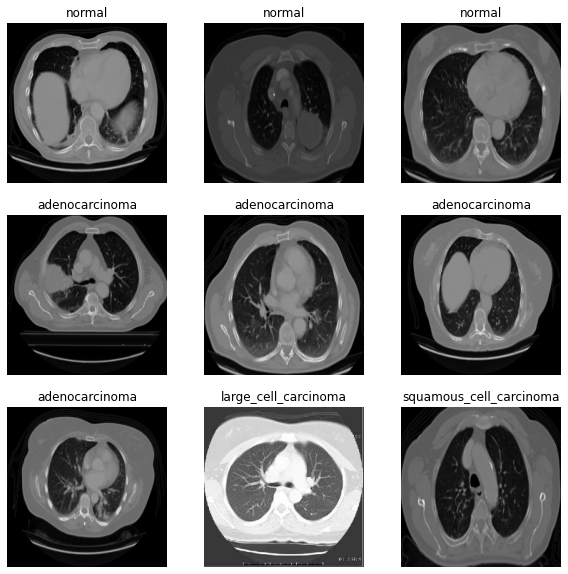

In [39]:
# Code for visualization




plt.figure(figsize=(10, 10)) # stating the size
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classnames[labels[i]]) # class names to be used as labels, we have already defined class names
        plt.axis('off')


Need to build our model, should we see if we can import one first and just run that? compare it to our own model?



In [87]:
# this is loading in a previously trained model

base_mod = tf.keras.applications.ResNet101V2(input_shape=(224,224,3),include_top=False,weights="imagenet")
# weights = imagenet refers to the imagenet database
# Freezing Layers by setting the trainable layers to false
for layer in base_mod.layers:
    layer.trainable = False

In [88]:
# resnet is a massive library, we need to optimise to get the best speed/accuracy payoff

In [89]:
# more code for building models


x = base_mod.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x) # activation function relu being used
x = tf.keras.layers.Dropout(0.2)(x) # a dropout to avoid overfitting 
x = tf.keras.layers.Dense(4, activation = "softmax")(x) # softmax here...
model_1 = Model(inputs= base_mod.input , outputs = x)

Need to train the model on only the train data using validate for model fitting 


In [19]:
# for defining F1
import keras.backend as K

In [20]:
# defing f1 score using predictions

def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [21]:
METRICS = [
      'accuracy',f1_score
]

In [95]:
# need to compile the model here
# use x entropy for the loss function

model_1.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = METRICS)
# setting learning rate, using the most commonly used optimizer 'Adam'

# need to think about accuracy here this needs to be displayed when fitting the model

In [96]:
# train on training data 



history=model_1.fit(train_dataset,validation_data=valid_dataset,epochs = 40,verbose = 1)

# talk about verbose here

Epoch 1/40
10/10 [==============================] - 49s 4s/step - loss: 104.3557 - accuracy: 0.3042 - f1_score: 0.3068 - val_loss: 22.8668 - val_accuracy: 0.3077 - val_f1_score: 0.3077
Epoch 2/40
10/10 [==============================] - 44s 4s/step - loss: 15.0119 - accuracy: 0.4320 - f1_score: 0.4311 - val_loss: 4.5684 - val_accuracy: 0.2308 - val_f1_score: 0.2338
Epoch 3/40
10/10 [==============================] - 44s 4s/step - loss: 6.1819 - accuracy: 0.4871 - f1_score: 0.4898 - val_loss: 2.4069 - val_accuracy: 0.4872 - val_f1_score: 0.4872
Epoch 4/40
10/10 [==============================] - 47s 5s/step - loss: 3.1344 - accuracy: 0.5291 - f1_score: 0.5317 - val_loss: 2.7426 - val_accuracy: 0.4615 - val_f1_score: 0.4416
Epoch 5/40
10/10 [==============================] - 48s 5s/step - loss: 1.6596 - accuracy: 0.5890 - f1_score: 0.5790 - val_loss: 0.6973 - val_accuracy: 0.7179 - val_f1_score: 0.6479
Epoch 6/40
10/10 [==============================] - 46s 5s/step - loss: 0.9862 - accur

In [10]:
# final accuracy at around 81% this is not good enough
# need to think about what is making the model fail

Need to save the model as it is before taking the model over the test data

In [97]:
# code for saving the model

model_1.save("./Desktop/Diss_saved_models/ResNetmod2")


INFO:tensorflow:Assets written to: /Users/elliotttrott/Desktop/Diss_saved_models/ResNetmod2/assets


/Users/elliotttrott/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/Users/elliotttrott/opt/anaconda3/lib/python3.9/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Below display the fitting/loss 

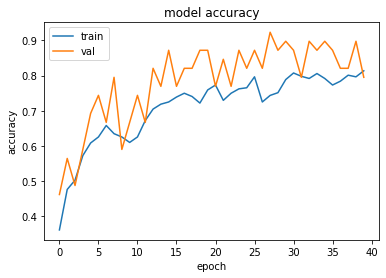

In [11]:
# code for producing a plot of acc over the X epochs 

from matplotlib import pyplot as plt # necessary import
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig("resnet_accuracy.png") # this will save the image of the accuracy for this certain model
plt.show()


In [ ]:
# this shows perhaps there arent enough epochs in the run

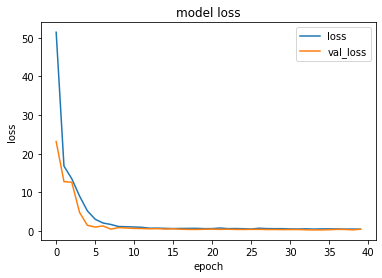

In [12]:
# for loss 
plt.plot(history.history['loss'],label='loss') # adding the labels
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

This is just showing the accuracy and loss of training over the training data

Need to use a fit of the model over the test data

Also need to take images from other folders and ensure that this model can be used more flexibly


In [98]:
# code for testing the model over the test data

model_1.evaluate(test_dataset)

# need to think more about how we can evaluate the model

2/2 [==============================] - 8s 4s/step - loss: 0.5541 - accuracy: 0.7903 - f1_score: 0.7915


[0.5541262626647949, 0.7903226017951965, 0.7915363311767578]

In [ ]:
# 75% accuracy for this run, need to trial this 

In [54]:
# for individual images from the benign dataset:
import numpy as np
from keras.preprocessing import image

image_width = 224
image_height = 224

# loading the image
img = image.load_img('./Desktop/BenignCTScns/test/Bengin/Bengincase(22).jpg', target_size = (image_width, image_height))
# need to think about the image size and how we are feeding into the model, the model was trained with batches needs some rearrangement before feeding in single image
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

In [55]:
y_prob11 = model_1.predict(img)

In [56]:
y_classes = y_prob11.argmax(axis=-1)
y_classes

array([2])

In [57]:
labels = ["adenocarcinoma",
"normal", "large_cell_carcinoma", "squamous_cell_carcinoma"]
predicted_label = np.array(sorted(labels))[y_classes]

In [58]:
predicted_label

array(['normal'], dtype='<U23')

Need to plot the failures and specific instances where errors occur with our model


In [14]:
# plotting the images 


def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3, figsize=(15,15))

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [15]:
# plotting the confusion matrix 

# Helper-function for printing confusion matrix

# Import a function from sklearn to calculate the confusion-matrix.
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    print("Confusion matrix:")
    
    # Print the confusion matrix as text.
    print(cm)
    
    # Print the class-names for easy reference.
    for i, class_name in enumerate(class_names):
        print("({0}) {1}".format(i, class_name))

In [16]:
# part of function for plotting example errors

def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != cls_test)

    # Get the file-paths for images that were incorrectly classified.
    image_paths = np.array(image_paths_test)[incorrect]

    # Load the first 9 images.
    images = load_images(image_paths=image_paths[0:9])
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    # Plot the 9 images we have loaded and their corresponding classes.
    # We have only loaded 9 images so there is no need to slice those again.
    plot_images(images=images,
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [17]:
# plotting a few examples of mis-classified images
def example_errors():
  
    # need to reset the generator, images will start being fed from the beginning
    test_generator.reset()
    
    # redict the classes for all images in the test-set.
    y_pred = model.predict(test_generator, steps=STEPS_TEST)

    # onvert the predicted classes from arrays to integers
    cls_pred = np.argmax(y_pred,axis=1)

    # plot examples of mis-classified images
    plot_example_errors(cls_pred)
    
    # confusion matrix
    print_confusion_matrix(cls_pred) 

In [23]:
example_errors

<function __main__.example_errors()>

In [7]:
# plotting figures 
classnames = ["adenocarcinoma",
"normal", "large_cell_carcinoma", "squamous_cell_carcinoma"]

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir_1 = pathlib.Path('./Desktop/CTscns1C/train')

In [8]:
# setting up batch/image sizes 
batch_size = 32
image_width = 224
image_height = 224

train_ds_1 = keras.preprocessing.image_dataset_from_directory(
    train_dir_1,
    seed=123,
    #validation_split=0.5,
    #subset='training',
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 618 files belonging to 4 classes.


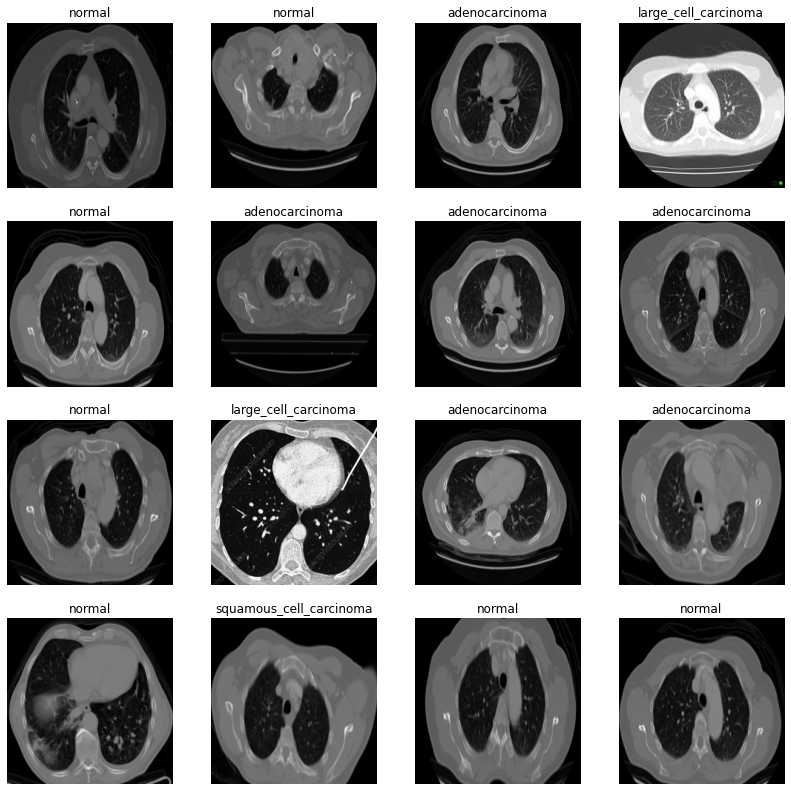

In [9]:
# plotting some examples
# making sure names are being adopted
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
for images, labels in train_ds_1.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classnames[labels[i]])
        plt.axis('off')

In [ ]:
# mobile net attempt

In [13]:
# loading the model

# importing a pretrained model MobileNet, using imagenet weights (these will be changed later)
base_model = keras.applications.MobileNetV3Small(input_shape=(image_width, image_height, 3),
                                            classes=400,
                                            include_top=False,
                                            weights='imagenet')

In [14]:
# Freeze certain layers that we want untrainable - give summary of the base model
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [15]:
# some data augmentation here as currently we are not working with a lage data set

data_augmentation = keras.models.Sequential([
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.2)
])

In [18]:
# stating the number of classes
num_classes = len(classnames)

# additional layers - using xm (x,mobilenet)
inputs = keras.Input(shape=(image_width, image_height, 3))
#x = data_augmentation(inputs)
xm = keras.applications.mobilenet_v3.preprocess_input(inputs)
xm = base_model(xm, training=False)
xm = keras.layers.GlobalAveragePooling2D()(xm)
xm = keras.layers.Dropout(0.2)(xm)


outputs = keras.layers.Dense(num_classes, activation='softmax')(xm) # last layer softmax 
model = keras.Model(inputs, outputs)

In [22]:
# compiling model metrics have previously been defined including F1 score
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[METRICS])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 1, 1, 1024)       1529968   
 l)                                                              
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 1,534,068
Trainable params: 4,100
Non-trainable

In [ ]:
# given us the model summary 

In [26]:
# setting up paths for train/valid/test - batch sizes were inconsistent with expected imports
train_dir = pathlib.Path('./Desktop/CTscns1C/train')
val_dir = pathlib.Path('./Desktop/CTscns1C/val')
test_dir = pathlib.Path('./Desktop/CTscns1C/test')

# show the quantity of images in the set a different way
train_image_count = len(list(train_dir.glob('*/*.png')))
train_image_count


# setting up batch/image sizes 
batch_size = 32
image_width = 224
image_height = 224

train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    #validation_split=0.5,
    #subset='training',
    image_size=(image_height, image_width),
    batch_size=batch_size
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 618 files belonging to 4 classes.
Found 39 files belonging to 4 classes.
Found 124 files belonging to 4 classes.


In [28]:
# performing 40 epochs at first
initial_epochs = 40

# introducing early stoppages
early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

# code for training the model over the training data using the validation also 
#- previously defined before compiling of Resnet
history = model.fit(train_ds, 
          validation_data=val_ds,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/40
20/20 [==============================] - 5s 240ms/step - loss: 0.4338 - accuracy: 0.4045 - f1_score: 1.0585 - val_loss: 0.4322 - val_accuracy: 0.4103 - val_f1_score: 1.1470
Epoch 2/40
20/20 [==============================] - 5s 236ms/step - loss: 0.4171 - accuracy: 0.4239 - f1_score: 1.0726 - val_loss: 0.4238 - val_accuracy: 0.4103 - val_f1_score: 0.9106
Epoch 3/40
20/20 [==============================] - 5s 241ms/step - loss: 0.4125 - accuracy: 0.3900 - f1_score: 1.0211 - val_loss: 0.4013 - val_accuracy: 0.4615 - val_f1_score: 0.9918
Epoch 4/40
20/20 [==============================] - 5s 235ms/step - loss: 0.3934 - accuracy: 0.3964 - f1_score: 1.0424 - val_loss: 0.3901 - val_accuracy: 0.4359 - val_f1_score: 1.0124
Epoch 5/40
20/20 [==============================] - 5s 239ms/step - loss: 0.3960 - accuracy: 0.4110 - f1_score: 0.9955 - val_loss: 0.4027 - val_accuracy: 0.3846 - val_f1_score: 1.0077


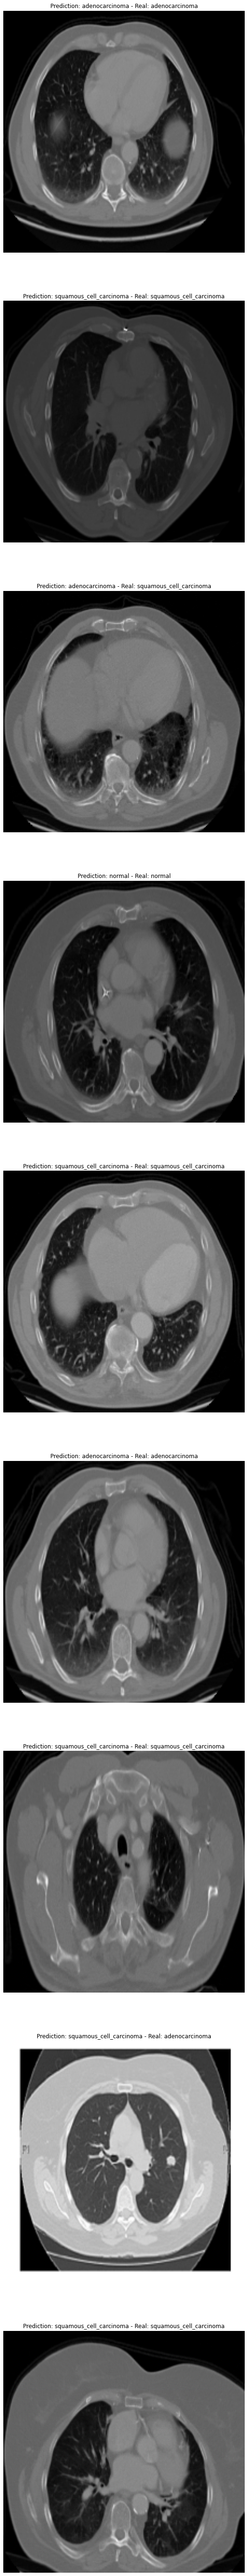

In [29]:
# make a prediction and compare to the real on the same plot - image taken from the test data set
plt.figure(figsize=(10, 100))
for images, labels in test_ds.take(1):
    prediction = model.predict(images,batch_size=32)
    for i in range(9):
        ax = plt.subplot(9, 1, i+1)
        pred = np.argmax(prediction[i])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Prediction: {classnames[pred]} - Real: {classnames[labels[i]]}')
        plt.axis('off')



Making Predictions over the test set

In [30]:
test_ds_unbatch = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=None,
    shuffle=False,
    image_size=(image_height, image_width),
    batch_size=image_height,
)
images = list(test_ds_unbatch.map(lambda x, y: x))
labels = list(test_ds_unbatch.map(lambda x, y: y))

Found 124 files belonging to 4 classes.


In [31]:
# make predictions over the test data
y_test = np.concatenate([y for x, y in test_ds_unbatch], axis=0)
prediction = model.predict(test_ds_unbatch)
pred = np.argmax(prediction,axis=1)
print(pred)    
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_test) # show the accuracy

[0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 1
 0 0 0 1 0 0 0 1 0 2 3 3 0 3 1 1 0 1 1 3 1 1 3 3 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 2 2 2 2 2 2 2 0 2 2 2 3 3 0 3 3 3 3 3 0 3 3 3 0 3 0 3 0 3 3 3 3 3 3 3 0
 3 3 3 0 3 3 3 3 0 3 3 0 1]


0.782258064516129

In [ ]:
# 78% accuracy over the test data... still not high enough, try low level models

In [37]:
model.evaluate(test_ds)

4/4 [==============================] - 1s 225ms/step - loss: 0.6608 - accuracy: 0.4355 - f1_score: 1.0775


[0.6608232259750366, 0.4354838728904724, 1.077531099319458]